## EDA 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('salary_data_cleaned.csv')

In [43]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark_yn,excel_yn,aws_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,48,1,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,37,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,11,1,0,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,56,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,23,1,0,0,1,0


In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn'],
      dtype='object')

## Title simplifier and seniority classification

In [45]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [46]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [47]:
df['job_simp'].value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [48]:
df['seniority'] = df['Job Title'].apply(seniority)

In [49]:
df.seniority.value_counts()

na        544
senior    195
junior      3
Name: seniority, dtype: int64

## fix Los Angeles

In [50]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA' )

In [51]:
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
IN     10
WI     10
MO      9
AZ      9
AL      8
DE      6
GA      6
KY      6
MI      6
CT      5
IA      5
NE      4
LA      4
OR      4
NM      3
KS      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

## job description length


In [52]:
df['job_desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [53]:
df['job_desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: job_desc_len, Length: 742, dtype: int64

## Compitetor count

In [54]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [55]:
df.num_comp.head()

0    0
1    0
2    0
3    3
4    3
Name: num_comp, dtype: int64

In [56]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [57]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simp',
       'seniority', 'job_desc_len', 'num_comp'],
      dtype='object')

## convert hourly salary to annual

In [58]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [60]:
df['min_salary'].head()

0    53
1    63
2    80
3    56
4    86
Name: min_salary, dtype: int64

In [62]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [63]:
df[df.hourly == 1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [64]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [65]:
df.company_txt


0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

# EDA

In [67]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python_yn,R_yn,spark_yn,excel_yn,aws_yn,job_desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.522911,0.237197,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.499812,0.425651,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [68]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_txt', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'excel_yn', 'aws_yn', 'job_simp',
       'seniority', 'job_desc_len', 'num_comp'],
      dtype='object')

<AxesSubplot:xlabel='Rating', ylabel='Count'>

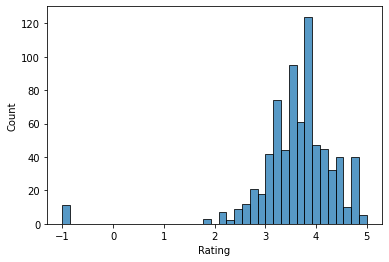

In [72]:
# histogram of Rating
sns.histplot(df['Rating'])

<AxesSubplot:xlabel='average_salary', ylabel='Count'>

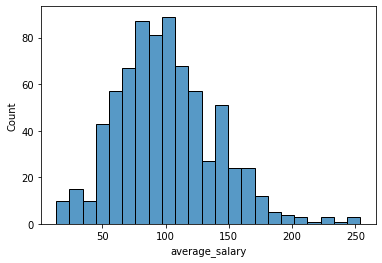

In [74]:
# histogram of average salary
sns.histplot(df['average_salary'])

<AxesSubplot:xlabel='min_salary', ylabel='Count'>

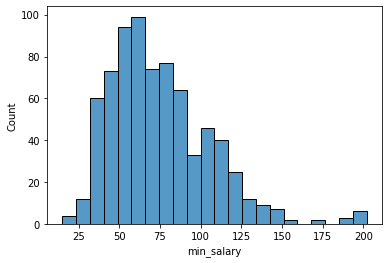

In [75]:
# hist of min salary
sns.histplot(df['min_salary'])

<AxesSubplot:xlabel='max_salary', ylabel='Count'>

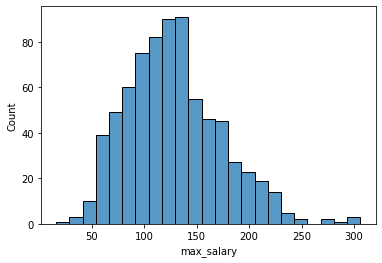

In [76]:
# hist of max salary
sns.histplot(df['max_salary'])

<AxesSubplot:xlabel='age', ylabel='Count'>

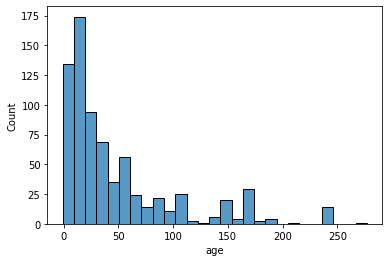

In [78]:
#age
sns.histplot(df['age'])
# as the age is not normally distributed we cannot use is for regular regression 
# so in future we might need to normalize the data 

<AxesSubplot:xlabel='job_desc_len', ylabel='Count'>

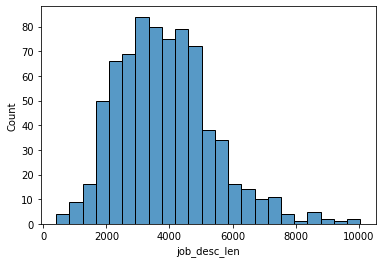

In [79]:
# description length
sns.histplot(df['job_desc_len'])

<AxesSubplot:>

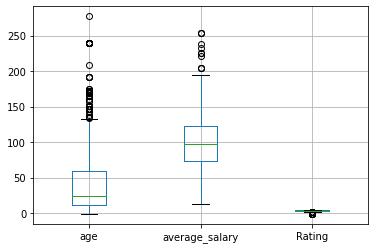

In [83]:
df.boxplot(column=['age','average_salary','Rating'])

<AxesSubplot:>

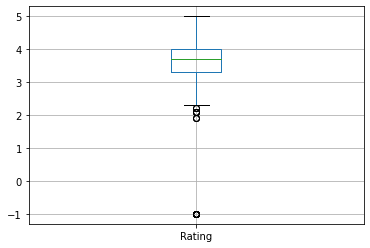

In [84]:
df.boxplot(column=['Rating'])

<AxesSubplot:>

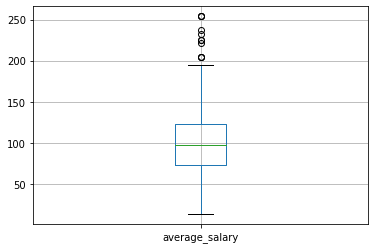

In [85]:
df.boxplot(column=['average_salary'])

In [88]:
df[['age','average_salary','Rating','job_desc_len']].corr()

,age,average_salary,Rating,job_desc_len
age,1.000000,0.019574,0.023162,0.164188
average_salary,0.019574,1.000000,0.013492,0.078808
Rating,0.023162,0.013492,1.000000,-0.012281
job_desc_len,0.164188,0.078808,-0.012281,1.000000
